In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
me = Base.classes.measurement
stat = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(me.tobs), func.avg(me.tobs), func.max(me.tobs)).\
        filter(me.date >= start_date).filter(me.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
dip = calc_temps('2016-01-01', '2016-12-31')
dip

[(56.0, 74.14421827631008, 84.0)]

In [11]:
# Plot the results from your previous query as a bar chart. 

pip = pd.DataFrame(dip)
pip

pip = pip.rename(columns={0 : "min", 1 : "avg", 2 : "max"})
pip

# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

,min,avg,max
0,56.0,74.144218,84.0


/var/folders/lv/_vx_bsx91xdd_9b_rm7j76gm0000gn/T/ipykernel_57383/3521735235.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".k" (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(x, y, yerr=(pip["max"]-pip["min"])/2, fmt='.k', marker="o", markersize=12);


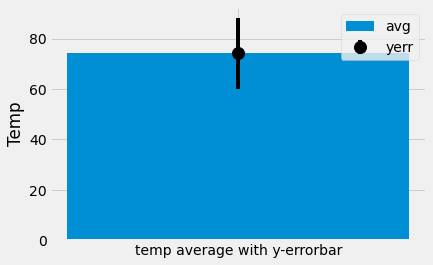

In [22]:
x = [1]
y = [pip["avg"]]
labels = ['temp average with y-errorbar']

tick_locations = list(x)
plt.bar(x,height = pip["avg"])
plt.xticks(tick_locations, labels)
plt.errorbar(x, y, yerr=(pip["max"]-pip["min"])/2, fmt='.k', marker="o", markersize=12);
plt.ylabel("Temp")
plt.legend(['avg','yerr'])
plt.show()

### Daily Rainfall Average

In [13]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.

engine.execute("SELECT station.station, station.name, measurement.prcp, sum(measurement.tobs), station.latitude, station.longitude, station.elevation FROM station, measurement WHERE station.station=measurement.station and measurement.date >= '2017-01-01' and measurement.date <= '2017-08-23' GROUP BY station.station, station.name ORDER BY measurement.prcp desc;").all()
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


[('USC00513117', 'KANEOHE 838.1, HI US', 0.29, 15367.0, 21.4234, -157.8015, 14.6),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.03, 15994.0, 21.3331, -157.8025, 152.4),
 ('USC00519281', 'WAIHEE 837.5, HI US', 0.03, 15944.0, 21.45167, -157.84888999999998, 32.9),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.0, 15004.0, 21.5213, -157.8374, 7.0),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 17233.0, 21.2716, -157.8168, 3.0),
 ('USC00517948', 'PEARL CITY, HI US', None, 7924.0, 21.3934, -157.9751, 11.9),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', None, 16113.0, 21.33556, -157.71139, 19.5)]

### Daily Temperature Normals

In [14]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(me.tobs), func.avg(me.tobs), func.max(me.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", me.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [15]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'


def daily_normals(day_date):
    temps = session.query(func.min(me.tobs), func.avg(me.tobs), func.max(me.tobs)).\
                          filter(func.strftime("%m-%d", me.date) == day_date).all()
    return temps
    

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date)

# Strip off the year and save a list of strings in the format %m-%d
trip_mmdd = trip_dates.strftime('%m-%d')

# Use the `daily_normals` function to calculate the normals for each date string 
normal = []
for c in trip_mmdd:
    #unpack daily_normals
    normal.append(*daily_normals(c))
    
normal

# and append the results to a list called `normals`.

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [16]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normal, trip_dates, columns = ['Tmin', 'Tavg', 'Tmax'])
normals_df

,Tmin,Tavg,Tmax
2017-08-01,67.0,75.540000,83.0
2017-08-02,68.0,75.603774,84.0
2017-08-03,70.0,76.611111,85.0
2017-08-04,69.0,76.711538,84.0
2017-08-05,69.0,76.148148,82.0
2017-08-06,67.0,76.250000,83.0
2017-08-07,71.0,77.156863,83.0


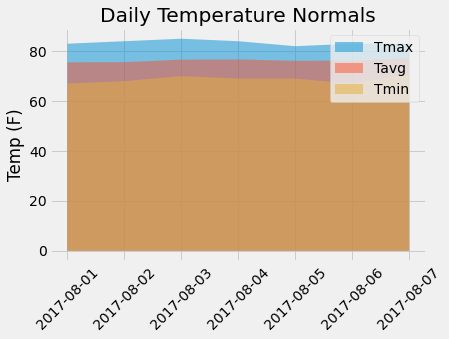

In [17]:
# Plot the daily normals as an area plot with `stacked=False`

plt.fill_between(normals_df.index, normals_df["Tmax"], alpha=0.5)
plt.fill_between(normals_df.index, normals_df["Tavg"], alpha=0.5)
plt.fill_between(normals_df.index, normals_df["Tmin"], alpha=0.5)
plt.xticks(rotation=45)
plt.title("Daily Temperature Normals")
plt.ylabel('Temp (F)')
plt.legend(['Tmax', 'Tavg','Tmin'])
plt.show()

## Close Session

In [18]:
session.close()